In [2]:
# Load the data from the csv-files
import pandas as pd
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
# Investigate the shapes of the Titanic dataset
print('train has {} rows and {} colums'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape)) 

train has 891 rows and 12 colums
test has 418 rows and 11 columns


In [4]:
# Display the structure of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Display the structure of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Display the column heads and the five first rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Remove missing values
train = train.dropna(subset=["Embarked"])

In [8]:
# Drop Cabin
train = train.drop("Cabin", axis=1)

In [9]:
# Fix age where it's missing by using mean
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

In [10]:
# Display the structure of the train dataset after above fixes
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [11]:
# Prepare and clean the data, transform text into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [12]:
# Remove missing values
train = train.dropna(subset=["Embarked"])

In [13]:
# Drop Cabin
train = train.drop("Cabin", axis=1)

KeyError: "['Cabin'] not found in axis"

In [14]:
# Fix age where it's missing by using mean
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)


In [15]:
# Display the structure of the train dataset after above fixes
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


In [16]:
# Display all unique values in columns
print('There are {} different (uniqe) PassengerIds in the data'.format(train["PassengerId"].nunique()))
print('There are {} different (uniqe) names in the data'.format(train["Name"].nunique()))
print('There are {} different (uniqe) ticket numbers in the data'.format(train["Ticket"].nunique()))   

There are 889 different (uniqe) PassengerIds in the data
There are 889 different (uniqe) names in the data
There are 680 different (uniqe) ticket numbers in the data


In [17]:
# Cleaning the data, remove identifying data
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

In [18]:
# Display the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [19]:
# Prepare and clean the data, transform text into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
# Listing the maximum values
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))    

The maximum age is 80.0
The maximum fare is 512.3292


In [21]:
# Normalize the data to a number between 0.0 and 1.0
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'.format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [22]:
# Separating input from labels and training from testing sets
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
    input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [24]:
# Save the data to the filesystem
import numpy as np

with open('../data/train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('../data/test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)

In [25]:
# Baseline model, random classifier
import random
random.seed(a=None, version=2)

def classify(passenger):
    return random.randint(0, 1)

In [26]:
# Runs classifier
def run(f_classify, x):
    return list(map(f_classify, x))

In [27]:
# Run classifier on every item in the training set
result = run(classify, train_input)

print(result)

[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 

In [28]:
# Evaluate the classifier
def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions,actual))
    ))
    return '{} correct predictions out of {}. Accuracy {:.0f} %'.format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))


370 correct predictions out of 711. Accuracy 52 %


In [29]:
# Try with always predict a passengers died
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))


445 correct predictions out of 711. Accuracy 63 %


In [30]:
# Confusion matrix of the predict death classifier
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[445,   0],
       [266,   0]])

In [31]:
# The precision score, accuracy of the positive predictions
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'.format(precision_score(train_labels, predictions)))

The precision score of the predict_death classifier is 0.0


/tmp/Python38/Python-3.8.5/QuantumML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# The recall score, accuracy of the actual positives
from sklearn.metrics import recall_score
print('The recall score of the predict_death classifier is {}'.format(recall_score(train_labels, predictions)))

The recall score of the predict_death classifier is 0.0


In [33]:
# The specificyty(accuracy of the actual negatives) and the npv(accuracy of the negative predictions)
def specificity(matrix):
    """The function specificity takes the confusion matrix as a parameter (line 1). It
        divides the true negatives (matrix[0][0]) by the sum of the true negatives and'
        the false positives (matrix[0][1]) (line 2)."""
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    """The function npv takes the confusion matrix as a parameter (line 4) and di-
        vides the true negatives by the sum of the true negatives and the false nega-
        tives (matrix[1][0])."""
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.63


In [34]:
# Lets calculate precision, recall, specifity and npv for our random classifier
random_predictions =run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'.format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'.format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'.format(specificity(random_cm)))
print('The npv core of the random classifier is {:.2f}'.format(npv(random_cm)))      

The precision score of the random classifier is 0.37
The recall score of the random classifier is 0.52
The specificity score of the random classifier is 0.48
The npv core of the random classifier is 0.62


In [35]:
# A generalized hypocrit classifier
def hypocrite(passanger, weight):
    """The hypocrite classifier takes the passenger data and a weight value. The weight
        is a number between −1 and 1. It denotes the classifier’s tendency to predict
        death (negative values) or survival (positive values).
        The formula weight*0.5+random.uniform(0, 1) generates numbers between −0.5
        and 1.5. The min and max functions ensure the result to be between 0 and 1. The
        round function returns either 0 (death) or 1 (survival).
        Depending on the weight, the chances to return one or the other prediction
        differs.
    """
    return round(min(1, max(0,weight*0.5+random.uniform(0,1))))

In [36]:
# The scores of the hypocrite Classifier, tendency -1 (predicts death)
w_predictions = run(lambda passenger: hypocrite(passenger, -1),
train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.00
The recall score of the hypocrite classifier is 0.00
The specificity score of the hypocrite classifier is 1.00
The npv score of the hypocrite classifier is 0.63


/tmp/Python38/Python-3.8.5/QuantumML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# The scores of the hypocrite Classifier, tendency 0 (random prediction)
w_predictions = run(lambda passenger: hypocrite(passenger, 0),
train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.35
The recall score of the hypocrite classifier is 0.47
The specificity score of the hypocrite classifier is 0.47
The npv score of the hypocrite classifier is 0.60


In [38]:
# The scores of the hypocrite Classifier, tendency 1 (predicts survival)
w_predictions = run(lambda passenger: hypocrite(passenger, 1),
train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.37
The recall score of the hypocrite classifier is 1.00
The specificity score of the hypocrite classifier is 0.00
The npv score of the hypocrite classifier is 0.00


In [39]:
# Run the hypocrite classifiers
import numpy as np

# number of steps to consider between −1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [−1, −0.95, ... 0.9, 0.95, 1.0]
weights = list(map(
    lambda weight: round(weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

# list of confusion matrices at every steo
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

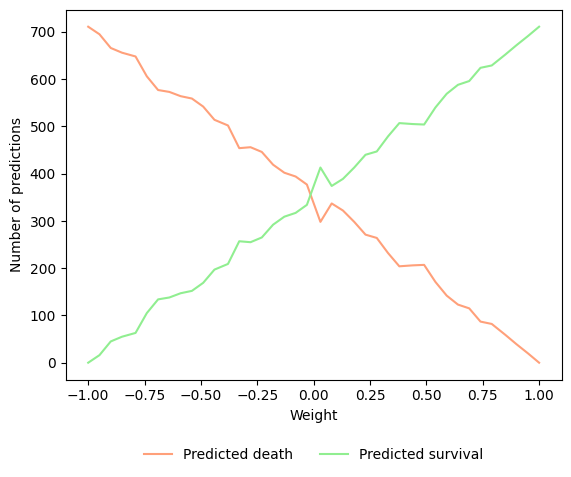

In [40]:
# Plot the distribution of predictions
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x−axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon', # color of the graph
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x−axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen', # color of the graph
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
    bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [41]:
# Let’s see how the different hypocrite classifiers perform at the four metrics depending on the weight.
l_precision = list(map(lambda step: precision_score(train_labels,
l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions
[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/tmp/Python38/Python-3.8.5/QuantumML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


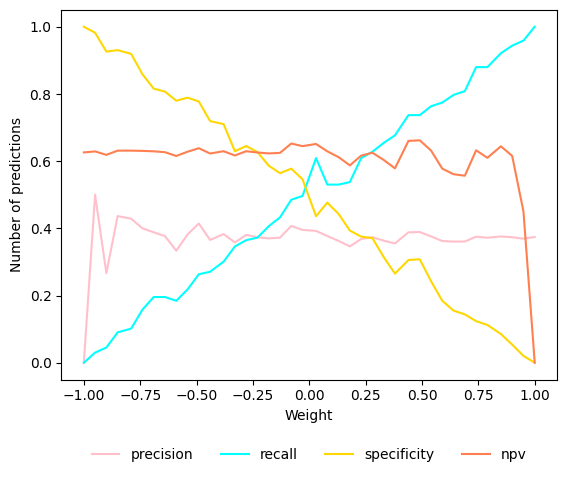

In [42]:
# Plot the performance measures
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(
handles=[m_precision, m_recall, m_specificity, m_npv],
loc='upper center',
bbox_to_anchor=(0.5, -0.15),
framealpha=0.0,
ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

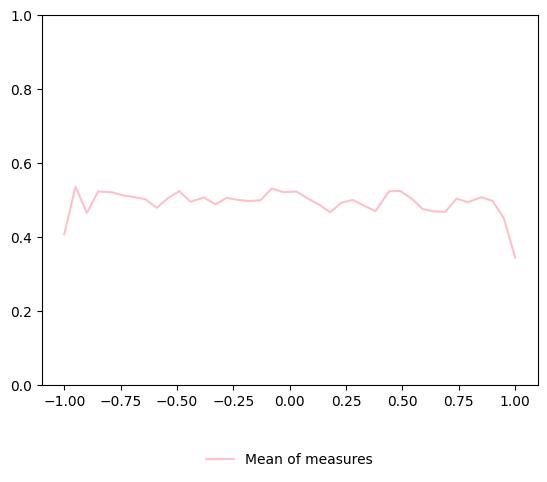

In [43]:
# Calculating the mean of the measures
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of measures")

plt.legend(handles=[m_mean], loc='upper center',
           bbox_to_anchor=(0.5, -0.15), framealpha=0.0)
plt.ylim(0,1)
plt.show()

In [44]:
# Create a reusable function to unmask the hypocrite classifier

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
    print('The information level is: {:.2f}'.format(cr_level))

In [45]:
# The report of the random classifier
classifier_report(
    "Random PQC",
    run,
    classify,
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.39
The recall score of the Random PQC classifier is 0.55
The specificity score of the Random PQC classifier is 0.49
The npv score of the Random PQC classifier is 0.64
The information level is: 0.52
